In [1]:
from collections import Counter,defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
#from simulate_data import *
#from topic_model import *
from lda_clust.topic_model import *
from lda_clust.simulate_data import *

### EDA for simulated data under Model 1 (M1)

In [287]:
# Initial case
sim_data_m1=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = False, 
                    gamma=1, eta=.05,
                    csi=5, omega=10, seed=1111)


In [237]:
# Revised_sim_data folder
sim_data_m1=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = False, 
                    gamma=5, eta=.05,
                    csi=5, omega=10, seed=111)

In [270]:
# FIXED data structure
sim_data_m1=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=5, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = False, command_level_topics = False, 
                          gamma=10, eta=.01,
                          seed=111)

In [190]:
sim_data_m1=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = False, 
                    gamma=1, eta=.01,
                    csi=5, omega=10, seed=1111)

In [275]:
sim_data_m1['w']

{0: {0: array([29, 29, 29, 29, 29, 29, 29, 20, 29, 29]),
  1: array([20, 20, 29, 29, 29, 29, 20, 29, 29, 29]),
  2: array([20, 29, 20, 20, 20, 29, 29, 29, 29, 29]),
  3: array([20, 20, 20, 29, 29, 29, 20, 20, 29, 29]),
  4: array([29, 20, 20, 29, 29, 20, 29, 29, 29, 29])},
 1: {0: array([29, 20, 29, 20, 29, 29, 20, 29, 29, 20]),
  1: array([29, 29, 20, 29, 29, 29, 29, 20, 31, 29]),
  2: array([29, 20, 29, 20, 20, 20, 29, 20, 29, 20]),
  3: array([29, 29, 29, 20, 20, 20, 29, 29, 20, 20]),
  4: array([29, 29, 29, 20, 29, 20, 20, 29, 20, 20])},
 2: {0: array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25]),
  1: array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25]),
  2: array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25]),
  3: array([25, 25, 25, 25, 25, 25, 31, 25, 25, 25]),
  4: array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25])},
 3: {0: array([20, 29, 29, 29, 20, 20, 20, 29, 29, 29]),
  1: array([29, 29, 29, 29, 29, 29, 29, 29, 29, 29]),
  2: array([29, 29, 20, 29, 29, 20, 29, 29, 29, 20]),
  3: array([2

In [277]:
sim_data_m1['t']

array([1, 1, 3, 1, 0, 2, 2, 1, 1, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 0, 1, 0,
       3, 2, 2, 1, 3, 0, 2, 1, 1, 2, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 1, 3,
       1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 3, 2, 1, 2, 1, 3, 0, 3,
       1, 2, 2, 0, 3, 1, 0, 1, 1, 1, 0, 0, 3, 2, 0, 3, 3, 0, 1, 3, 2, 1,
       2, 2, 1, 3, 0, 1, 1, 3, 3, 2, 0, 3, 0, 2, 3, 1, 2, 3, 1, 3, 3, 2,
       0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 3, 1, 2, 0, 3, 2, 3, 2, 1,
       2, 0, 1, 1, 0, 1, 3, 0, 3, 1, 2, 2, 0, 2, 1, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 1, 0, 0, 3, 1, 3, 0, 3, 0, 2, 3, 1, 2, 1, 3, 3, 2, 2, 1, 1,
       1, 3, 1, 3, 1, 1, 2, 0, 0, 2, 1, 1, 0, 3, 2, 2, 2, 3, 1, 1, 3, 1,
       3, 0])

In [402]:
with open('./data/revised_sim_data/data_m1.pkl','wb') as file:
    pickle.dump(sim_data_m1,file,protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
with open('./data/data_m1.pkl','rb') as file:
    data_m1=pickle.load(file)

In [4]:
# Get size of vocabulary
def voc_size(data):
    ls=list()
    #make values (lists) of inner dic, a single list
    for k,v in data['w'].items():
        for i in v.values():
            ls.extend(i)
    return(len(Counter(ls)))

In [5]:
voc_size(sim_data_m1)

43

Text(0.5, 1.0, 'Distribution of words under each topic k')

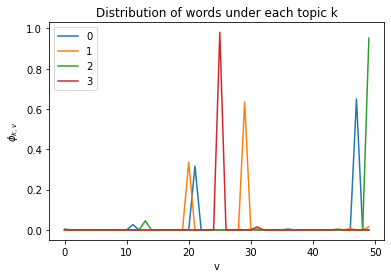

In [272]:
ax = pd.DataFrame(list(sim_data_m1['phi'].values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

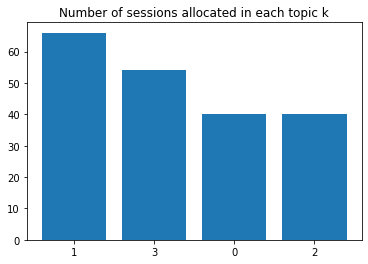

In [271]:
data=Counter(sim_data_m1['t'])
plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
plt.title("Number of sessions allocated in each topic k")
plt.show()


Text(0.5, 1.0, 'Number of commands in each session')

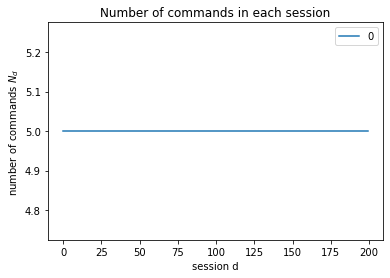

In [273]:
axx=pd.DataFrame(sim_data_m1['N']).plot()
axx.set_xlabel("session d")
axx.set_ylabel("number of commands "+r'$N_d$')
plt.title("Number of commands in each session")

Text(0.5, 1.0, 'Average number of words in commands of each session')

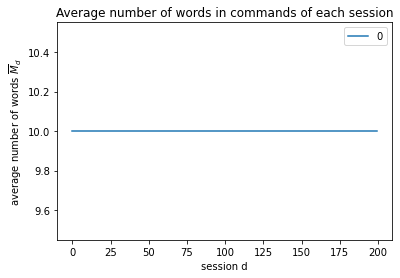

In [274]:
d2={k: np.mean(v) for k, v in sim_data_m1['M'].items()}   
axxx=pd.DataFrame(list(d2.values())).plot()
axxx.set_xlabel("session d")
axxx.set_ylabel("average number of words "+r'$\overline{M}_d$')
plt.title("Average number of words in commands of each session")

### EDA for simulated data under Model 2 (M2)

In [224]:
sim_data_m2=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = False, 
                    gamma=1, eta=.05,alpha=2,alpha0=1,
                    csi=5, omega=10, seed=1111)

In [8]:
# Revised_sim_data folder
sim_data_m2=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = False, 
                    gamma=5, eta=.05,alpha=5,alpha0=1,
                    csi=5, omega=10, seed=111)

In [294]:
# FIXED data structure
sim_data_m2=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=5, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = True, command_level_topics = False, 
                          gamma=10, eta=.01,alpha=20,alpha0=1,
                          seed=111)

In [381]:
with open('./data/revised_sim_data/data_m2.pkl','wb') as file:
    pickle.dump(sim_data_m2,file,protocol=pickle.HIGHEST_PROTOCOL)

In [194]:
sim_data_m2=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = False, 
                    gamma=1, eta=.01,alpha=4,alpha0=1,
                    csi=5, omega=10, seed=1111)

In [284]:
sim_data_m2['w']

{0: {0: array([29, 20, 29, 20, 29, 29, 17, 34, 29, 29]),
  1: array([29, 33, 29, 20, 29, 31, 29, 20, 29, 29]),
  2: array([29, 29, 29, 29, 29, 29, 29, 29, 29, 29]),
  3: array([17, 20, 29, 34, 29, 29, 20, 29, 29, 29]),
  4: array([29, 29, 29, 29, 20, 20, 29, 29, 29, 29])},
 1: {0: array([39, 29, 20, 29, 29, 34, 29, 29, 29, 29]),
  1: array([34, 29, 29, 17, 29, 49, 20, 34, 20, 20]),
  2: array([29, 29, 29, 29, 29, 34, 20, 20, 29, 29]),
  3: array([29, 34, 20, 34, 29, 33, 29, 29, 29, 29]),
  4: array([29, 20, 20, 29, 29, 29, 29, 20, 34, 20])},
 2: {0: array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25]),
  1: array([25, 25, 25, 25, 25, 25, 25, 25, 39, 25]),
  2: array([25, 25, 25, 25, 25, 25, 25, 25, 25, 34]),
  3: array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25]),
  4: array([25, 25, 25, 25, 25, 31, 25, 25, 25, 25])},
 3: {0: array([29, 29, 29, 29, 29, 29, 20, 29, 34, 29]),
  1: array([29, 29, 39, 29, 29, 34, 46, 29, 29, 20]),
  2: array([29, 29, 29, 29, 20, 29, 34, 20, 29, 29]),
  3: array([2

In [11]:
voc_size(sim_data_m2)

43

In [51]:
with open('./data/data_m2.pkl','wb') as file:
    pickle.dump(sim_data_m2,file,protocol=pickle.HIGHEST_PROTOCOL)

Text(0.5, 1.0, 'Distribution of words under each topic k')

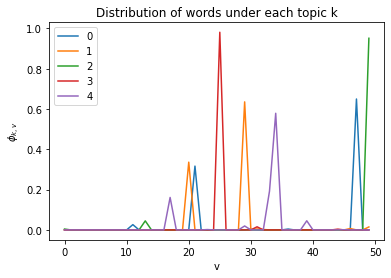

In [295]:
ax2 = pd.DataFrame(list(sim_data_m2['phi'].values())).T.plot()
ax2.set_xlabel("v")
ax2.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

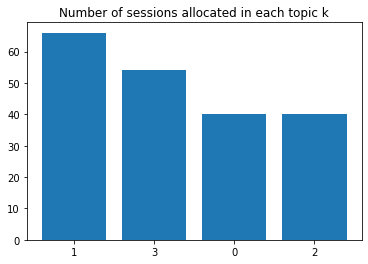

In [296]:
data2=Counter(sim_data_m2['t'])
plt.bar(range(len(data2)), list(data2.values()), tick_label=list(data2.keys()))
plt.title("Number of sessions allocated in each topic k")
plt.show()


In [15]:
sim_data_m2['theta']

array([0.95507144, 0.70189911, 0.79347365, 0.97692617])

In [298]:
# Get summaries for primary secondary topic allocations in simulated data
d3=defaultdict(list)
#make values (lists) of inner dic, a single list
for k,v in sim_data_m2['z'].items():
    ls=list()
    for i in v.values():
        ls.extend(i)
    d3[k]=ls
#apply Counter on values of dic 
d4={k:Counter(v) for k,v in d3.items()}

Text(0.5, 1.0, 'Proportion of 0s and 1s in each session')

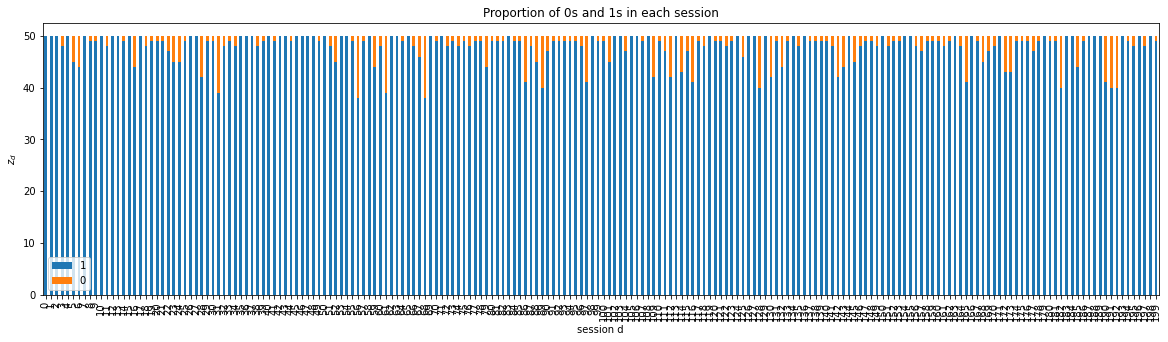

In [299]:
axx2=pd.DataFrame(d4).T.fillna(0).plot.bar(stacked=True,figsize=(20,5))
axx2.set_xlabel("session d")
axx2.set_ylabel(r'$z_{d}$')
plt.title("Proportion of 0s and 1s in each session")

Text(0.5, 1.0, 'Number of commands in each session')

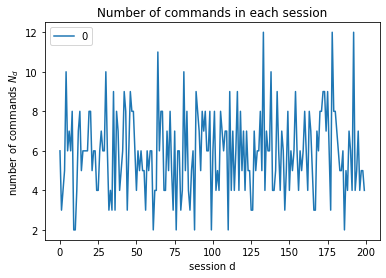

In [13]:
axxx2=pd.DataFrame(sim_data_m2['N']).plot()
axxx2.set_xlabel("session d")
axxx2.set_ylabel("number of commands "+r'$N_d$')
plt.title("Number of commands in each session")

Text(0.5, 1.0, 'Average number of words in commands of each session')

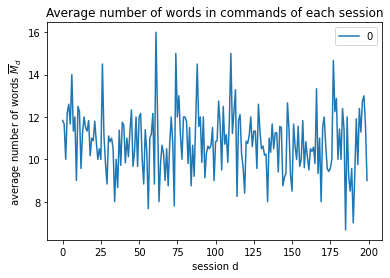

In [14]:
d22={k: np.mean(v) for k, v in sim_data_m2['M'].items()}   
axxxx2=pd.DataFrame(list(d22.values())).plot()
axxxx2.set_xlabel("session d")
axxxx2.set_ylabel("average number of words "+r'$\overline{M}_d$')
plt.title("Average number of words in commands of each session")

### EDA for simulated data under Model 3 (M3)

In [181]:
# Initial Case
sim_data_m3=simulate_data(D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = True, 
                    gamma=1, eta=.05,tau=.05,
                    csi=5, omega=10, seed=1111)

In [15]:
# Revised_sim_data folder
sim_data_m3=simulate_data(D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = True, 
                    gamma=5, eta=.05,tau=.05,
                    csi=5, omega=10, seed=111)

In [318]:
# FIXED data structure
sim_data_m3=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=5, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = False, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,#alpha=20,alpha0=1,
                          seed=111)

In [391]:
with open('./data/revised_sim_data/data_m3.pkl','wb') as file:
    pickle.dump(sim_data_m3,file,protocol=pickle.HIGHEST_PROTOCOL)

In [304]:
sim_data_m3=simulate_data(D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = True, 
                    gamma=1, eta=.01,tau=.01,
                    csi=5, omega=10, seed=1111)

In [306]:
sim_data_m3=simulate_data(D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = True, 
                    gamma=1, eta=.05,tau=.01,
                    csi=5, omega=10, seed=11112)

In [58]:
sim_data_m3

array([3, 7, 7, 7])

In [37]:
sim_data_m3.keys()

dict_keys(['t', 'N', 'M', 'w', 'phi', 's', 'psi'])

In [49]:
with open('./data/data_m3.pkl','wb') as file:
    pickle.dump(sim_data_m3,file,protocol=pickle.HIGHEST_PROTOCOL)

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

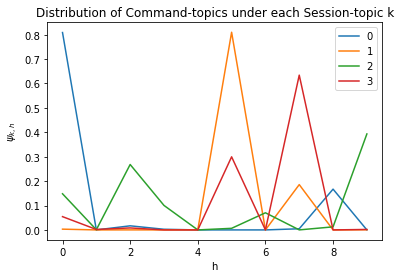

In [23]:
ax3 = pd.DataFrame(list(sim_data_m3['psi'].values())).T.plot()
ax3.set_xlabel("h")
ax3.set_ylabel(r'$\psi_{k,h}$')
#ax3.get_legend().remove()
plt.title("Distribution of Command-topics under each Session-topic k")


Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

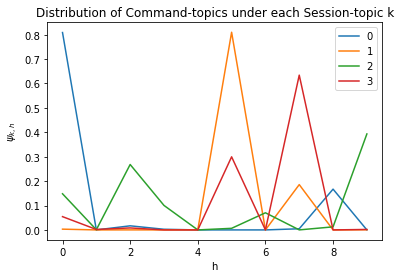

In [31]:
ax3 = pd.DataFrame(list(sim_data_m3['psi'].values())).T.plot()
ax3.set_xlabel("h")
ax3.set_ylabel(r'$\psi_{k,h}$')
#ax3.get_legend().remove()
plt.title("Distribution of Command-topics under each Session-topic k")

Text(0.5, 1.0, 'Distribution of words under each Command-topic k')

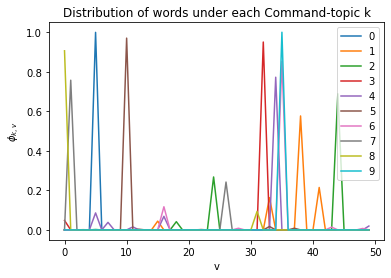

In [22]:
ax33 = pd.DataFrame(list(sim_data_m3['phi'].values())).T.plot()
ax33.set_xlabel("v")
ax33.set_ylabel(r'$\phi_{k,v}$')
#ax33.get_legend().remove()
plt.title("Distribution of words under each Command-topic k")

Text(0.5, 1.0, 'Distribution of words under each Command-topic k')

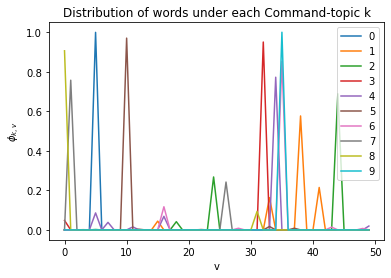

In [32]:
ax33 = pd.DataFrame(list(sim_data_m3['phi'].values())).T.plot()
ax33.set_xlabel("v")
ax33.set_ylabel(r'$\phi_{k,v}$')
#ax33.get_legend().remove()
plt.title("Distribution of words under each Command-topic k")

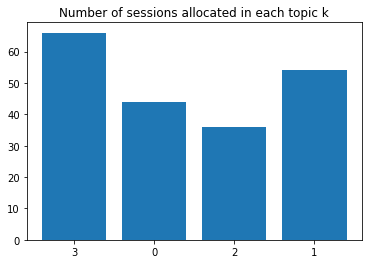

In [17]:
data3=Counter(sim_data_m3['t'])
plt.bar(range(len(data3)), list(data3.values()), tick_label=list(data3.keys()))
plt.title("Number of sessions allocated in each topic k")
plt.show()

### EDA for simulated data under Model 4 (M4)

In [356]:
sim_data_m4=simulate_data(D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = True, 
                    gamma=1, eta=.05,alpha=2,alpha0=1,tau=.05,
                    csi=5, omega=10, seed=1111)

In [19]:
# Revised_sim_data folder
sim_data_m4=simulate_data(D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = True, 
                    gamma=5, eta=.05,alpha=5,alpha0=1,tau=.05,
                    csi=5, omega=10, seed=111)

In [327]:
# FIXED data structure
sim_data_m4=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=5, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = True, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,
                          seed=111)

In [396]:
with open('./data/revised_sim_data/data_m4.pkl','wb') as file:
    pickle.dump(sim_data_m4,file,protocol=pickle.HIGHEST_PROTOCOL)

In [217]:
sim_data_m4=simulate_data(D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = True, 
                    gamma=1, eta=.01,alpha=4,alpha0=1,tau=.01,
                    csi=5, omega=10, seed=1111)

In [27]:
sim_data_m4.keys()

dict_keys(['t', 'N', 'M', 'w', 'phi', 's', 'psi', 'z', 'theta'])

In [52]:
with open('./data/data_m4.pkl','wb') as file:
    pickle.dump(sim_data_m4,file,protocol=pickle.HIGHEST_PROTOCOL)

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

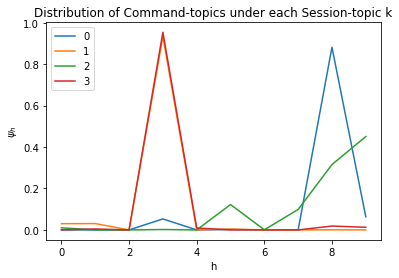

In [4]:
ax4 = pd.DataFrame(list(sim_data_m4['psi'].values())).T.plot()
ax4.set_xlabel("h")
ax4.set_ylabel(r'$\psi_{h}$')
plt.title("Distribution of Command-topics under each Session-topic k")

Text(0.5, 1.0, 'Distribution of words under each Command-topic h')

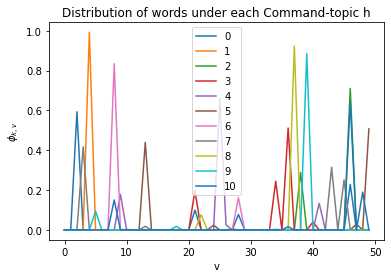

In [5]:
ax44 = pd.DataFrame(list(sim_data_m4['phi'].values())).T.plot()
ax44.set_xlabel("v")
ax44.set_ylabel(r'$\phi_{k,v}$')
#ax4.get_legend().remove()

plt.title("Distribution of words under each Command-topic h")

In [30]:
sim_data_m4['theta']

array([0.4889984 , 0.79734872, 0.47935534, 0.53043717, 0.84575927,
       0.13038267, 0.84478097, 0.81868973, 0.43675306, 0.74233951])

In [330]:
# Get summaries for primary secondary topic allocations in simulated data
d4=defaultdict(list)
#make values (lists) of inner dic, a single list
for k,v in sim_data_m4['z'].items():
    ls=list()
    for i in v.values():
        ls.extend(i)
    d4[k]=ls
#apply Counter on values of dic 
d44={k:Counter(v) for k,v in d4.items()}

Text(0.5, 1.0, 'Proportion of 0s and 1s in each session')

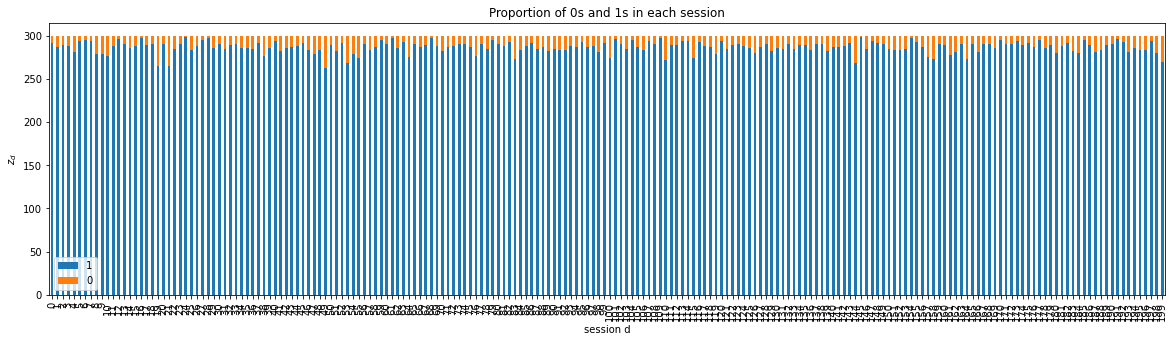

In [331]:
axx4=pd.DataFrame(d44).T.fillna(0).plot.bar(stacked=True,figsize=(20,5))
axx4.set_xlabel("session d")
axx4.set_ylabel(r'$z_{d}$')
plt.title("Proportion of 0s and 1s in each session")

# Simulate data for varying size of ξ, affecting size of documents Nd (number of commands in each doc), for each model 1-4


## Model 1 


In [65]:
seed_cnt=100
for i in range(5,211,50):
    sim_data_m1=simulate_data(
        D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
        secondary_topic = False, command_level_topics = False, 
        gamma=5, eta=.05,
        csi=i, omega=10, seed=seed_cnt)
    with open(f'./simulated_data/varying_csi/model_1/data_m1_csi_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m1,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100
    

## Model 2


In [3]:
seed_cnt=100
for i in range(5,211,50):
    sim_data_m2=simulate_data(
        D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
        secondary_topic = True, command_level_topics = False, 
        gamma=5, eta=.05,alpha=5,alpha0=1,
        csi=i, omega=10, seed=seed_cnt)
    with open(f'./simulated_data/varying_csi/model_2/data_m2_csi_{str(i)}.pkl','wb') as file:
            pickle.dump(sim_data_m2,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

## Model 3

In [4]:
seed_cnt=100
for i in range(5,211,50):
    sim_data_m3=simulate_data(
        D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
        secondary_topic = False, command_level_topics = True, 
        gamma=5, eta=.05,tau=.05,
        csi=i, omega=10, seed=seed_cnt)
    with open(f'./simulated_data/varying_csi/model_3/data_m3_csi_{str(i)}.pkl','wb') as file:
            pickle.dump(sim_data_m3,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

## Model 4

In [5]:
seed_cnt=100
for i in range(5,211,50):
    sim_data_m4=simulate_data(
        D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
        secondary_topic = True, command_level_topics = True, 
        gamma=5, eta=.05,alpha=5,alpha0=1,tau=.05,
        csi=i, omega=10, seed=seed_cnt)
    with open(f'./simulated_data/varying_csi/model_4/data_m4_csi_{str(i)}.pkl','wb') as file:
            pickle.dump(sim_data_m4,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

# Simulation study for fixed structure of data

## Model 1

In [338]:
# Fixed D,M Varying N
seed_cnt=111
for i in range(5,131,25):
    sim_data_m1=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=i, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = False, command_level_topics = False, 
                          gamma=10, eta=.01,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_N/model_1/data_m1_N_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m1,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [339]:
# Fixed D,N Varying M
seed_cnt=111
for i in range(5,131,25):
    sim_data_m1=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=i, fixed_M=True,
                          secondary_topic = False, command_level_topics = False, 
                          gamma=10, eta=.01,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_M/model_1/data_m1_M_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m1,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [340]:
# Fixed M,N Varying D
seed_cnt=111
for i in range(50,1051,200):
    sim_data_m1=simulate_data(D=i, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = False, command_level_topics = False, 
                          gamma=10, eta=.01,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_D/model_1/data_m1_D_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m1,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [21]:
# Investigate range [50,250]
# Fixed M,N Varying D
seed_cnt=1111
for i in range(100,201,50):
    sim_data_m1=simulate_data(D=i, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = False, command_level_topics = False, 
                          gamma=10, eta=.01,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_D/model_1/data_m1_D_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m1,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [24]:
np.array(range(100,201,50))

array([100, 150, 200])

## Model 2

In [341]:
# Fixed D,M Varying N
seed_cnt=111
for i in range(5,131,25):
    sim_data_m2=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=i, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = True, command_level_topics = False, 
                          gamma=10, eta=.01,alpha=20,alpha0=1,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_N/model_2/data_m2_N_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m2,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [342]:
# Fixed D,N Varying M
seed_cnt=111
for i in range(5,131,25):
    sim_data_m2=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=i, fixed_M=True,
                          secondary_topic = True, command_level_topics = False, 
                          gamma=10, eta=.01,alpha=20,alpha0=1,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_M/model_2/data_m2_M_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m2,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [343]:
# Fixed M,N Varying D
seed_cnt=111
for i in range(50,1051,200):
    sim_data_m2=simulate_data(D=i, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = True, command_level_topics = False, 
                          gamma=10, eta=.01,alpha=20,alpha0=1,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_D/model_2/data_m2_D_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m2,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [25]:
# Investigate range [50,250]
# Fixed M,N Varying D
seed_cnt=1111
for i in range(100,201,50):
    sim_data_m2=simulate_data(D=i, K=4, fixed_K = True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = True, command_level_topics = False, 
                          gamma=10, eta=.01,alpha=20,alpha0=1,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_D/model_2/data_m2_D_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m2,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

## Model 3

In [344]:
# Fixed D,M Varying N
seed_cnt=111
for i in range(5,131,25):
    sim_data_m3=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=i, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = False, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_N/model_3/data_m3_N_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m3,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [345]:
# Fixed D,N Varying M
seed_cnt=111
for i in range(5,131,25):
    sim_data_m3=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=i, fixed_M=True,
                          secondary_topic = False, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,
                          seed=seed_cnt)
    #with open(f'./simulated_data/fixed_structure/var_M/model_3/data_m3_M_{str(i)}.pkl','wb') as file:
    #    pickle.dump(sim_data_m3,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [27]:
sim_data_m3=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=105, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = False, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,
                          seed=511)

In [25]:
with open(f'./simulated_data/fixed_structure/var_M/model_3/data_m3_M_105.pkl','rb') as file:     
        sim_data_m3=pickle.load(file)  

In [26]:
sim_data_m3.keys()

dict_keys(['t', 'N', 'M', 'w', 'phi', 's', 'psi'])

In [42]:
len(sim_data_m3['w'])

200

In [34]:
sim_data_m3['w']

{0: {0: array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]),
  1: array([ 1, 26,  1,  1,  1,  1,  1,  1,  1, 26]),
  2: array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
  3: array([ 1, 26,  1, 26,  1, 26,  1,  1, 26,  1]),
  4: array([ 1,  1,  1, 26, 26,  1,  1,  1,  1, 26]),
  5: array([10, 33, 10, 10, 10, 10, 10, 10, 10, 10]),
  6: array([ 1,  1,  1,  1,  1, 26,  1,  1,  1,  1]),
  7: array([ 1,  1,  1,  1, 26,  1, 26,  1,  1, 26]),
  8: array([35, 35, 35, 35, 35, 35, 35, 35, 35, 35]),
  9: array([44, 44, 44, 44, 24, 24, 24, 44, 24, 24]),
  10: array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]),
  11: array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]),
  12: array([ 1,  1,  1,  1, 26,  1,  1,  1, 26,  1]),
  13: array([ 1,  1,  1,  1,  1, 26,  1,  1,  1,  1]),
  14: array([26,  1,  1,  1,  1,  1, 26,  1,  1, 26]),
  15: array([26,  1,  1,  1,  1, 26,  1,  1,  1,  1]),
  16: array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]),
  17: array([26,  1,  1, 26,  1, 26,  1, 26,  1,  1]),
  18: array([ 1, 26, 26, 26

In [346]:
# Fixed M,N Varying D
seed_cnt=111
for i in range(50,1051,200):
    sim_data_m3=simulate_data(D=i, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = False, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_D/model_3/data_m3_D_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m3,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

#### Investigate case M=30,N=10 (var_M) : distribution of command topics under session topics

In [4]:
with open(f'./simulated_data/fixed_structure/var_M/model_3/data_m3_M_30.pkl','rb') as file:
    data_m3_M_30=pickle.load(file)

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

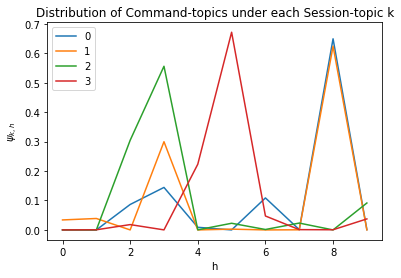

In [6]:
ax3 = pd.DataFrame(list(data_m3_M_30['psi'].values())).T.plot()
ax3.set_xlabel("h")
ax3.set_ylabel(r'$\psi_{k,h}$')
#ax3.get_legend().remove()
plt.title("Distribution of Command-topics under each Session-topic k")

#### Investigate case M=105,N=10 (var_M) : distribution of command topics under session topics

In [8]:
with open(f'./simulated_data/fixed_structure/var_M/model_3/data_m3_M_105.pkl','rb') as file:
    data_m3_M_105=pickle.load(file)

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

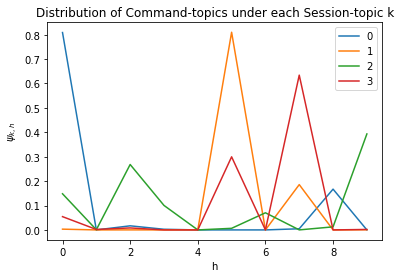

In [10]:
ax3 = pd.DataFrame(list(data_m3_M_105['psi'].values())).T.plot()
ax3.set_xlabel("h")
ax3.set_ylabel(r'$\psi_{k,h}$')
#ax3.get_legend().remove()
plt.title("Distribution of Command-topics under each Session-topic k")

#### Investigate case M=10,N=105 (var_N) : distribution of words under topics

In [13]:
with open(f'./simulated_data/fixed_structure/var_N/model_3/data_m3_N_105.pkl','rb') as file:
    data_m3_N_105=pickle.load(file)

Text(0.5, 1.0, 'Distribution of words under each Command-topic k')

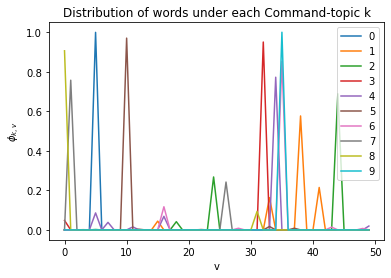

In [14]:
ax33 = pd.DataFrame(list(data_m3_N_105['phi'].values())).T.plot()
ax33.set_xlabel("v")
ax33.set_ylabel(r'$\phi_{k,v}$')
#ax33.get_legend().remove()
plt.title("Distribution of words under each Command-topic k")

#### Investigate case D=650 (var_D) : distribution of command topics under session topics

In [26]:
with open(f'./simulated_data/fixed_structure/var_D/model_3/data_m3_D_650.pkl','rb') as file:
    data_m3_D_650=pickle.load(file)

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

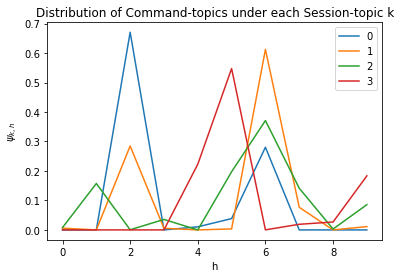

In [27]:
ax3 = pd.DataFrame(list(data_m3_D_650['psi'].values())).T.plot()
ax3.set_xlabel("h")
ax3.set_ylabel(r'$\psi_{k,h}$')
#ax3.get_legend().remove()
plt.title("Distribution of Command-topics under each Session-topic k")

#### Investigate case D=450 (var_D) : distribution of words under topics

In [23]:
with open(f'./simulated_data/fixed_structure/var_D/model_3/data_m3_D_450.pkl','rb') as file:
    data_m3_D_450=pickle.load(file)

Text(0.5, 1.0, 'Distribution of words under each Command-topic k')

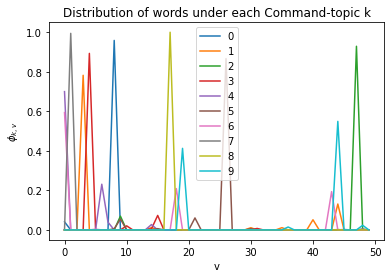

In [25]:
ax33 = pd.DataFrame(list(data_m3_D_450['phi'].values())).T.plot()
ax33.set_xlabel("v")
ax33.set_ylabel(r'$\phi_{k,v}$')
#ax33.get_legend().remove()
plt.title("Distribution of words under each Command-topic k")

## Model 4

In [86]:
# Fixed D,M Varying N
seed_cnt=111
for i in range(5,131,25):
    sim_data_m4=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=i, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = True, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_N/model_4/data_m4_N_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m4,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [87]:
# Fixed D,N Varying M
seed_cnt=111
for i in range(5,131,25):
    sim_data_m4=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=i, fixed_M=True,
                          secondary_topic = True, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_M/model_4/data_m4_M_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m4,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [88]:
# Fixed M,N Varying D
seed_cnt=111
for i in range(50,1051,200):
    sim_data_m4=simulate_data(D=i, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=10, fixed_M=True,
                          secondary_topic = True, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,
                          seed=seed_cnt)
    with open(f'./simulated_data/fixed_structure/var_D/model_4/data_m4_D_{str(i)}.pkl','wb') as file:
        pickle.dump(sim_data_m4,file,protocol=pickle.HIGHEST_PROTOCOL)
    seed_cnt+=100

In [3]:
with open(f'./simulated_data/fixed_structure/var_M/model_4/data_m4_M_30.pkl','rb') as file:     
        sim_data_m4=pickle.load(file)  

#### Investigate case M=30,N=10 (var_M) : distribution of command topics under session topics

In [27]:
with open(f'./simulated_data/fixed_structure/var_M/model_4/data_m4_M_30.pkl','rb') as file:
    data_m4_M_30=pickle.load(file)

In [29]:
data_m4_M_30['z']

{0: {0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]),
  1: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]),
  2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]),
  3: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]),
  4: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]),
  5: array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
         1, 1, 0, 1, 0, 1, 0, 0]),
  6: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]),
  7: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]),
  8: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

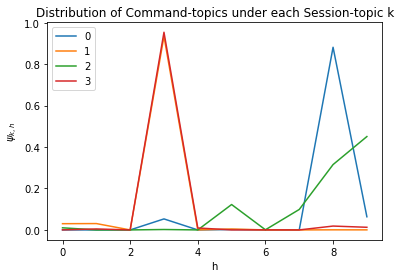

In [4]:
ax3 = pd.DataFrame(list(data_m4_M_30['psi'].values())).T.plot()
ax3.set_xlabel("h")
ax3.set_ylabel(r'$\psi_{k,h}$')
#ax3.get_legend().remove()
plt.title("Distribution of Command-topics under each Session-topic k")

In [71]:
data_m4_M_30['psi']

{0: array([1.59067465e-14, 2.44189580e-07, 4.25068574e-07, 5.30899762e-02,
        3.63950245e-14, 1.80213679e-03, 6.60296593e-05, 2.44338123e-06,
        8.81592346e-01, 6.34463985e-02]),
 1: array([3.00407361e-02, 3.06277956e-02, 4.43556185e-08, 9.34169526e-01,
        7.25461090e-05, 4.37370283e-03, 4.63131195e-05, 3.13297770e-14,
        4.20643280e-04, 2.48692595e-04]),
 2: array([1.01649356e-02, 2.54930556e-05, 6.85288646e-27, 1.96617413e-03,
        1.10402966e-06, 1.22543881e-01, 6.07910555e-04, 9.87236727e-02,
        3.15384669e-01, 4.50582160e-01]),
 3: array([2.18476426e-04, 4.66969830e-03, 1.08378298e-05, 9.54084482e-01,
        9.36295419e-03, 4.05478873e-05, 2.99999766e-04, 1.10685211e-05,
        1.85959222e-02, 1.27060131e-02])}

In [72]:
# Force peaks of command topics distribution under session topics

data_m4_M_30['psi'][1][1],data_m4_M_30['psi'][1][3]=data_m4_M_30['psi'][1][3],data_m4_M_30['psi'][1][1]
data_m4_M_30['psi'][2][5],data_m4_M_30['psi'][2][9]=data_m4_M_30['psi'][2][9],data_m4_M_30['psi'][2][5]

In [77]:
rev_psi=data_m4_M_30['psi']

In [3]:
with open(f'./simulated_data/fixed_structure/var_M/model_4/psi_m4_M_30.pkl','rb') as file:
    rev_psi=pickle.load(file)

In [4]:
# REVISED Simulate data (REVISED psi)
sim_data_m4=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=50, fixed_V = True,
                          N_num=10, fixed_N= True, M_num=30, fixed_M=True, psi_dic=rev_psi, fixed_psi=True,
                          secondary_topic = True, command_level_topics = True, 
                          gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,
                          seed=211)

In [8]:
with open(f'./simulated_data/fixed_structure/var_M/model_4/data_m4_M_30_rev_psi.pkl','wb') as file:
    pickle.dump(sim_data_m4,file,protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with open(f'./simulated_data/fixed_structure/var_M/model_4/data_m4_M_30_rev_psi.pkl','rb') as file:
    sim_data_m4=pickle.load(file)

In [11]:
sim_data_m4['psi']

{0: array([1.59067465e-14, 2.44189580e-07, 4.25068574e-07, 5.30899762e-02,
        3.63950245e-14, 1.80213679e-03, 6.60296593e-05, 2.44338123e-06,
        8.81592346e-01, 6.34463985e-02]),
 1: array([3.00407361e-02, 9.34169526e-01, 4.43556185e-08, 3.06277956e-02,
        7.25461090e-05, 4.37370283e-03, 4.63131195e-05, 3.13297770e-14,
        4.20643280e-04, 2.48692595e-04]),
 2: array([1.01649356e-02, 2.54930556e-05, 6.85288646e-27, 1.96617413e-03,
        1.10402966e-06, 4.50582160e-01, 6.07910555e-04, 9.87236727e-02,
        3.15384669e-01, 1.22543881e-01]),
 3: array([2.18476426e-04, 4.66969830e-03, 1.08378298e-05, 9.54084482e-01,
        9.36295419e-03, 4.05478873e-05, 2.99999766e-04, 1.10685211e-05,
        1.85959222e-02, 1.27060131e-02])}

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

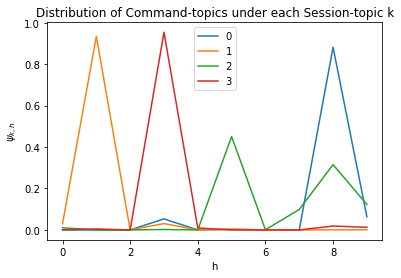

In [6]:
ax3 = pd.DataFrame(list(sim_data_m4['psi'].values())).T.plot()
ax3.set_xlabel("h")
ax3.set_ylabel(r'$\psi_{k,h}$')
#ax3.get_legend().remove()
plt.title("Distribution of Command-topics under each Session-topic k")

#### Investigate case M=10,N=30 (var_N) : distribution of command topics under session topics

In [41]:
with open(f'./simulated_data/fixed_structure/var_N/model_4/data_m4_N_30.pkl','rb') as file:
    data_m4_N_30=pickle.load(file)

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

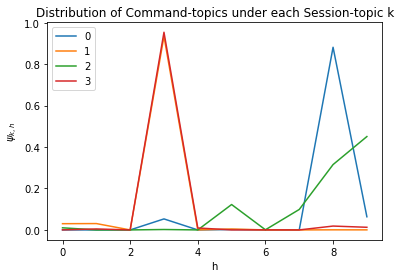

In [42]:
ax3 = pd.DataFrame(list(data_m4_N_30['psi'].values())).T.plot()
ax3.set_xlabel("h")
ax3.set_ylabel(r'$\psi_{k,h}$')
#ax3.get_legend().remove()
plt.title("Distribution of Command-topics under each Session-topic k")

#### Investigate case D=850 (var_D) : distribution of command topics under session topics

In [47]:
with open(f'./simulated_data/fixed_structure/var_D/model_4/data_m4_D_850.pkl','rb') as file:
    data_m4_D_850=pickle.load(file)

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

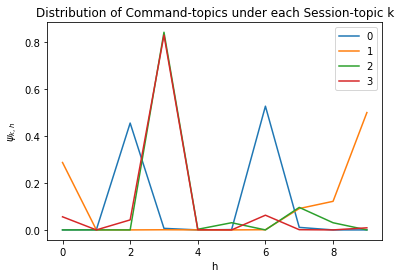

In [48]:
ax3 = pd.DataFrame(list(data_m4_D_850['psi'].values())).T.plot()
ax3.set_xlabel("h")
ax3.set_ylabel(r'$\psi_{k,h}$')
#ax3.get_legend().remove()
plt.title("Distribution of Command-topics under each Session-topic k")

## avoid overlapping session topic distrib

In [18]:
# testing for simulating data
test=np.random.dirichlet(np.ones(10)*0.1,10)

<AxesSubplot:>

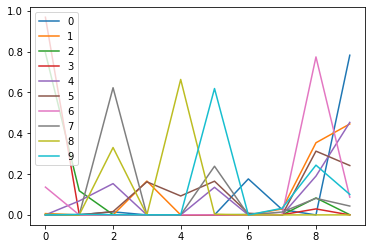

In [19]:
pd.DataFrame(test).T.plot()

In [20]:
test

array([[2.60507856e-10, 4.69235370e-04, 1.50886721e-02, 1.02884518e-07,
        5.68005618e-05, 4.80797032e-05, 1.76317497e-01, 2.60657430e-02,
        2.30957618e-05, 7.81930773e-01],
       [6.57008843e-03, 1.72172612e-07, 3.82928617e-11, 1.65783870e-01,
        9.24661751e-09, 2.14140377e-11, 1.27118252e-05, 2.89622638e-02,
        3.53306367e-01, 4.45364518e-01],
       [7.93582237e-01, 1.18245549e-01, 1.48672849e-03, 8.08746963e-11,
        1.48846212e-04, 9.47118742e-18, 2.30412447e-03, 2.91123084e-07,
        8.32506742e-02, 9.81549488e-04],
       [9.67886512e-01, 1.74120449e-03, 1.69691619e-12, 5.21891168e-19,
        5.47430919e-05, 2.42965610e-05, 3.40198803e-07, 9.04542213e-04,
        2.93883617e-02, 2.85917414e-16],
       [5.53097700e-05, 6.84047443e-02, 1.53235207e-01, 4.24295586e-07,
        9.51752105e-06, 1.35243032e-01, 1.41461161e-07, 4.11054165e-09,
        1.90027735e-01, 4.53023885e-01],
       [1.65585331e-03, 2.62185019e-12, 1.63041049e-02, 1.61987914e-01,
   

In [21]:
out=[np.argmax(i) for i in test]

In [22]:
out

[9, 9, 0, 0, 9, 8, 8, 2, 4, 5]

In [23]:
uniq=np.unique(out)

In [24]:
uniq[0:4]

array([0, 2, 4, 5])

In [25]:

hi=[out.index(i) for i in uniq[0:4]]

In [26]:
hi

[2, 7, 8, 9]

In [27]:
testnew=test[hi]

<AxesSubplot:>

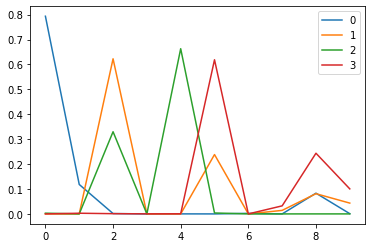

In [28]:
pd.DataFrame(testnew).T.plot()

In [39]:
len(range(9))*10

90

### simplex-like idea

In [4]:
test=np.random.dirichlet(np.ones(10)*0.1,1)
test

array([[3.11007069e-02, 1.12462224e-20, 2.28677528e-18, 1.26055921e-08,
        8.89957445e-01, 3.24541993e-03, 5.18631354e-03, 3.24711202e-02,
        3.80156799e-02, 2.33023867e-05]])

<AxesSubplot:>

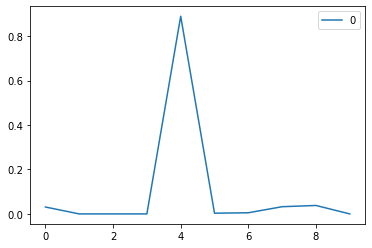

In [5]:
pd.DataFrame(test).T.plot()

In [8]:
np.argmax(test)

4

In [18]:
test=[0.5,0.1,0.1,0.1,0.1,0.1]
test2=[0.1,0.5,0.1,0.1,0.1,0.1]
test3=[0.1,0.1,0.5,0.1,0.1,0.1]

In [24]:
import scipy
scipy.spatial.distance.jaccard(test4, test2, w=None)

0.3333333333333333

In [21]:
test4=[.1,.4,.2,.1,.1,.1]

# Simulate data for varying size of D, for each model 1-4

## Model 1 

In [30]:
for i in range(1,6,1):
    print(10**i)

10
100
1000
10000
100000


In [41]:
for i in range(100,1000,200):
    print(i,i/10)

100 10.0
300 30.0
500 50.0
700 70.0
900 90.0


In [336]:
for i in range(5,131,25):
    print(i)

5
30
55
80
105
130


In [337]:
for i in range(50,1051,200):
    print(i)

50
250
450
650
850
1050


### Testing

In [ ]:
test_sim=simulate_data(D=100, K=3, fixed_K = True, H=2, fixed_H = True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = True, 
                    gamma=1.0, eta=1.0, alpha=1.0, alpha0=1.0, tau=1.0,
                    csi=5, omega=10, stick_truncation=100, seed=111)

In [ ]:
test_sim

In [ ]:
testdir=np.zeros(shape=(100,3))
for i in range(100):
    testdir[i]=np.random.dirichlet(alpha=np.ones(3)*.01)

In [ ]:
sum(testdir[:,1])/100

In [ ]:
sum(testdir[:,2])/100

In [ ]:
sum(testdir[:,0])/100

In [ ]:
theta=np.zeros(shape=(100,2))
for i in range(100):
    theta[i] = np.random.beta(a=1, b=1, size=3)

In [ ]:
sum(np.random.beta(a=2, b=1, size=100))/100

In [6]:
m1=topic_model(W=sim_data_m2_rev2['w'], K=4, H=0, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = False,
                    gamma=1.0, eta=1.0, tau=1,alpha0=1,alpha=1)


In [17]:
m1.init_counts()

KeyError: 0

In [5]:
m1.custom_init(t=sim_data_m1_rev['t'])

In [7]:
m1.random_init()

In [12]:
test=m1.MCMC(iterations=100,calculate_ll=True,burnin=0,return_t=True,return_z=True,return_change_t=True,return_change_z=True,thinning=10)

Progression: 4 / 100 difference of t= 0
Progression: 7 / 100 difference of t= 0
Progression: 8 / 100 difference of t= 0
Progression: 10 / 100 difference of t= 0
Progression: 11 / 100 difference of t= 0
Progression: 15 / 100 difference of t= 0
Progression: 21 / 100 difference of t= 0
Progression: 22 / 100 difference of t= 0
Progression: 24 / 100 difference of t= 0
Progression: 28 / 100 difference of t= 0
Progression: 29 / 100 difference of t= 0
Progression: 32 / 100 difference of t= 0
Progression: 33 / 100 difference of t= 0
Progression: 35 / 100 difference of t= 0
Progression: 36 / 100 difference of t= 0
Progression: 37 / 100 difference of t= 0
Progression: 41 / 100 difference of t= 0
Progression: 42 / 100 difference of t= 0
Progression: 45 / 100 accepted move for t
Progression: 47 / 100 difference of t= 0
Progression: 48 / 100 difference of t= 0
Progression: 49 / 100 difference of t= 0
Progression: 50 / 100 accepted move for t
Progression: 52 / 100 difference of t= 0
Progression: 56 /

In [13]:
test.keys()

dict_keys(['loglik', 't', 'z', 'change_t_counter', 'change_z_counter'])

In [12]:
np.where(test['change_s_counter']==1)

(array([ 1,  2,  4,  5,  9, 12, 13, 15, 18, 19, 21, 22, 23, 24, 26, 29, 30,
        34, 37, 38, 39, 40, 41, 42, 47, 49, 57, 59, 68, 69, 73, 78, 79, 81,
        84, 88, 90]),)

In [11]:
test['change_z_counter']

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
test['change_t_counter']

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0])

In [20]:
if sum(sim_data_m1_rev['t']-sim_data_m2_rev2['z'][0][0])!=0:
    print("yes")

ValueError: operands could not be broadcast together with shapes (200,) (12,) 

In [23]:
(10-0)%2

0

In [92]:
m1.t


array([1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 3,
       1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 3, 1, 2,
       1, 1, 0, 3, 1, 0, 1, 2, 1, 2, 2, 1, 1, 3, 0, 0, 2, 3, 3, 2, 0, 1,
       1, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 2, 3, 3, 1, 1, 0, 0, 1, 3, 1, 2, 3, 2, 2, 2,
       0, 0, 2, 1, 0, 2, 1, 3, 2, 3, 3, 3, 0, 1, 0, 2, 3, 1, 2, 1, 0, 2,
       2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 1,
       1, 1, 2, 1, 1, 3, 1, 0, 0, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 2, 2, 3, 1, 1, 1, 0, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 0,
       1, 2])

In [3]:
np.cumsum(np.array([1,2,3]))

array([1, 3, 6])

In [18]:
moves_probs = [5, 1]
moves_probs /= np.sum(moves_probs)

In [19]:
moves_probs

array([0.83333333, 0.16666667])

In [2]:
for i in range(100000+10000):
    if (i>=10000) and ((i-10000)%10==0):
        print(i)
        print((i -10000) // 10)
#(60 - 50) % 40 == 0

10000
0
10010
1
10020
2
10030
3
10040
4
10050
5
10060
6
10070
7
10080
8
10090
9
10100
10
10110
11
10120
12
10130
13
10140
14
10150
15
10160
16
10170
17
10180
18
10190
19
10200
20
10210
21
10220
22
10230
23
10240
24
10250
25
10260
26
10270
27
10280
28
10290
29
10300
30
10310
31
10320
32
10330
33
10340
34
10350
35
10360
36
10370
37
10380
38
10390
39
10400
40
10410
41
10420
42
10430
43
10440
44
10450
45
10460
46
10470
47
10480
48
10490
49
10500
50
10510
51
10520
52
10530
53
10540
54
10550
55
10560
56
10570
57
10580
58
10590
59
10600
60
10610
61
10620
62
10630
63
10640
64
10650
65
10660
66
10670
67
10680
68
10690
69
10700
70
10710
71
10720
72
10730
73
10740
74
10750
75
10760
76
10770
77
10780
78
10790
79
10800
80
10810
81
10820
82
10830
83
10840
84
10850
85
10860
86
10870
87
10880
88
10890
89
10900
90
10910
91
10920
92
10930
93
10940
94
10950
95
10960
96
10970
97
10980
98
10990
99
11000
100
11010
101
11020
102
11030
103
11040
104
11050
105
11060
106
11070
107
11080
108
11090
109
11100
110


22370
1237
22380
1238
22390
1239
22400
1240
22410
1241
22420
1242
22430
1243
22440
1244
22450
1245
22460
1246
22470
1247
22480
1248
22490
1249
22500
1250
22510
1251
22520
1252
22530
1253
22540
1254
22550
1255
22560
1256
22570
1257
22580
1258
22590
1259
22600
1260
22610
1261
22620
1262
22630
1263
22640
1264
22650
1265
22660
1266
22670
1267
22680
1268
22690
1269
22700
1270
22710
1271
22720
1272
22730
1273
22740
1274
22750
1275
22760
1276
22770
1277
22780
1278
22790
1279
22800
1280
22810
1281
22820
1282
22830
1283
22840
1284
22850
1285
22860
1286
22870
1287
22880
1288
22890
1289
22900
1290
22910
1291
22920
1292
22930
1293
22940
1294
22950
1295
22960
1296
22970
1297
22980
1298
22990
1299
23000
1300
23010
1301
23020
1302
23030
1303
23040
1304
23050
1305
23060
1306
23070
1307
23080
1308
23090
1309
23100
1310
23110
1311
23120
1312
23130
1313
23140
1314
23150
1315
23160
1316
23170
1317
23180
1318
23190
1319
23200
1320
23210
1321
23220
1322
23230
1323
23240
1324
23250
1325
23260
1326
23270
1327

34870
2487
34880
2488
34890
2489
34900
2490
34910
2491
34920
2492
34930
2493
34940
2494
34950
2495
34960
2496
34970
2497
34980
2498
34990
2499
35000
2500
35010
2501
35020
2502
35030
2503
35040
2504
35050
2505
35060
2506
35070
2507
35080
2508
35090
2509
35100
2510
35110
2511
35120
2512
35130
2513
35140
2514
35150
2515
35160
2516
35170
2517
35180
2518
35190
2519
35200
2520
35210
2521
35220
2522
35230
2523
35240
2524
35250
2525
35260
2526
35270
2527
35280
2528
35290
2529
35300
2530
35310
2531
35320
2532
35330
2533
35340
2534
35350
2535
35360
2536
35370
2537
35380
2538
35390
2539
35400
2540
35410
2541
35420
2542
35430
2543
35440
2544
35450
2545
35460
2546
35470
2547
35480
2548
35490
2549
35500
2550
35510
2551
35520
2552
35530
2553
35540
2554
35550
2555
35560
2556
35570
2557
35580
2558
35590
2559
35600
2560
35610
2561
35620
2562
35630
2563
35640
2564
35650
2565
35660
2566
35670
2567
35680
2568
35690
2569
35700
2570
35710
2571
35720
2572
35730
2573
35740
2574
35750
2575
35760
2576
35770
2577

3781
47820
3782
47830
3783
47840
3784
47850
3785
47860
3786
47870
3787
47880
3788
47890
3789
47900
3790
47910
3791
47920
3792
47930
3793
47940
3794
47950
3795
47960
3796
47970
3797
47980
3798
47990
3799
48000
3800
48010
3801
48020
3802
48030
3803
48040
3804
48050
3805
48060
3806
48070
3807
48080
3808
48090
3809
48100
3810
48110
3811
48120
3812
48130
3813
48140
3814
48150
3815
48160
3816
48170
3817
48180
3818
48190
3819
48200
3820
48210
3821
48220
3822
48230
3823
48240
3824
48250
3825
48260
3826
48270
3827
48280
3828
48290
3829
48300
3830
48310
3831
48320
3832
48330
3833
48340
3834
48350
3835
48360
3836
48370
3837
48380
3838
48390
3839
48400
3840
48410
3841
48420
3842
48430
3843
48440
3844
48450
3845
48460
3846
48470
3847
48480
3848
48490
3849
48500
3850
48510
3851
48520
3852
48530
3853
48540
3854
48550
3855
48560
3856
48570
3857
48580
3858
48590
3859
48600
3860
48610
3861
48620
3862
48630
3863
48640
3864
48650
3865
48660
3866
48670
3867
48680
3868
48690
3869
48700
3870
48710
3871
48720

5236
62370
5237
62380
5238
62390
5239
62400
5240
62410
5241
62420
5242
62430
5243
62440
5244
62450
5245
62460
5246
62470
5247
62480
5248
62490
5249
62500
5250
62510
5251
62520
5252
62530
5253
62540
5254
62550
5255
62560
5256
62570
5257
62580
5258
62590
5259
62600
5260
62610
5261
62620
5262
62630
5263
62640
5264
62650
5265
62660
5266
62670
5267
62680
5268
62690
5269
62700
5270
62710
5271
62720
5272
62730
5273
62740
5274
62750
5275
62760
5276
62770
5277
62780
5278
62790
5279
62800
5280
62810
5281
62820
5282
62830
5283
62840
5284
62850
5285
62860
5286
62870
5287
62880
5288
62890
5289
62900
5290
62910
5291
62920
5292
62930
5293
62940
5294
62950
5295
62960
5296
62970
5297
62980
5298
62990
5299
63000
5300
63010
5301
63020
5302
63030
5303
63040
5304
63050
5305
63060
5306
63070
5307
63080
5308
63090
5309
63100
5310
63110
5311
63120
5312
63130
5313
63140
5314
63150
5315
63160
5316
63170
5317
63180
5318
63190
5319
63200
5320
63210
5321
63220
5322
63230
5323
63240
5324
63250
5325
63260
5326
63270

77360
6736
77370
6737
77380
6738
77390
6739
77400
6740
77410
6741
77420
6742
77430
6743
77440
6744
77450
6745
77460
6746
77470
6747
77480
6748
77490
6749
77500
6750
77510
6751
77520
6752
77530
6753
77540
6754
77550
6755
77560
6756
77570
6757
77580
6758
77590
6759
77600
6760
77610
6761
77620
6762
77630
6763
77640
6764
77650
6765
77660
6766
77670
6767
77680
6768
77690
6769
77700
6770
77710
6771
77720
6772
77730
6773
77740
6774
77750
6775
77760
6776
77770
6777
77780
6778
77790
6779
77800
6780
77810
6781
77820
6782
77830
6783
77840
6784
77850
6785
77860
6786
77870
6787
77880
6788
77890
6789
77900
6790
77910
6791
77920
6792
77930
6793
77940
6794
77950
6795
77960
6796
77970
6797
77980
6798
77990
6799
78000
6800
78010
6801
78020
6802
78030
6803
78040
6804
78050
6805
78060
6806
78070
6807
78080
6808
78090
6809
78100
6810
78110
6811
78120
6812
78130
6813
78140
6814
78150
6815
78160
6816
78170
6817
78180
6818
78190
6819
78200
6820
78210
6821
78220
6822
78230
6823
78240
6824
78250
6825
78260
6826

92360
8236
92370
8237
92380
8238
92390
8239
92400
8240
92410
8241
92420
8242
92430
8243
92440
8244
92450
8245
92460
8246
92470
8247
92480
8248
92490
8249
92500
8250
92510
8251
92520
8252
92530
8253
92540
8254
92550
8255
92560
8256
92570
8257
92580
8258
92590
8259
92600
8260
92610
8261
92620
8262
92630
8263
92640
8264
92650
8265
92660
8266
92670
8267
92680
8268
92690
8269
92700
8270
92710
8271
92720
8272
92730
8273
92740
8274
92750
8275
92760
8276
92770
8277
92780
8278
92790
8279
92800
8280
92810
8281
92820
8282
92830
8283
92840
8284
92850
8285
92860
8286
92870
8287
92880
8288
92890
8289
92900
8290
92910
8291
92920
8292
92930
8293
92940
8294
92950
8295
92960
8296
92970
8297
92980
8298
92990
8299
93000
8300
93010
8301
93020
8302
93030
8303
93040
8304
93050
8305
93060
8306
93070
8307
93080
8308
93090
8309
93100
8310
93110
8311
93120
8312
93130
8313
93140
8314
93150
8315
93160
8316
93170
8317
93180
8318
93190
8319
93200
8320
93210
8321
93220
8322
93230
8323
93240
8324
93250
8325
93260
8326

9654
106550
9655
106560
9656
106570
9657
106580
9658
106590
9659
106600
9660
106610
9661
106620
9662
106630
9663
106640
9664
106650
9665
106660
9666
106670
9667
106680
9668
106690
9669
106700
9670
106710
9671
106720
9672
106730
9673
106740
9674
106750
9675
106760
9676
106770
9677
106780
9678
106790
9679
106800
9680
106810
9681
106820
9682
106830
9683
106840
9684
106850
9685
106860
9686
106870
9687
106880
9688
106890
9689
106900
9690
106910
9691
106920
9692
106930
9693
106940
9694
106950
9695
106960
9696
106970
9697
106980
9698
106990
9699
107000
9700
107010
9701
107020
9702
107030
9703
107040
9704
107050
9705
107060
9706
107070
9707
107080
9708
107090
9709
107100
9710
107110
9711
107120
9712
107130
9713
107140
9714
107150
9715
107160
9716
107170
9717
107180
9718
107190
9719
107200
9720
107210
9721
107220
9722
107230
9723
107240
9724
107250
9725
107260
9726
107270
9727
107280
9728
107290
9729
107300
9730
107310
9731
107320
9732
107330
9733
107340
9734
107350
9735
107360
9736
107370
9737

In [82]:
200/40

5.0

In [1]:
(100000 - 10000) // 100

900

In [99]:
with open("./results/test_m1.pkl",'rb') as patates:
        test_m1=pickle.load(patates)

In [107]:
test_m1['t'][999]

array([1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 3,
       1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 3, 1, 2,
       1, 1, 0, 3, 1, 0, 1, 2, 1, 2, 2, 1, 1, 3, 0, 0, 2, 3, 3, 2, 0, 1,
       1, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 2, 3, 3, 1, 1, 0, 0, 1, 3, 1, 2, 3, 2, 2, 2,
       0, 0, 2, 1, 0, 2, 1, 3, 2, 3, 3, 3, 0, 1, 0, 2, 3, 1, 2, 1, 0, 2,
       2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 1,
       1, 1, 2, 1, 1, 3, 1, 0, 0, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 2, 2, 3, 1, 1, 1, 0, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 0,
       1, 2])

In [105]:
sim_data_m1['t']

array([1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 3,
       1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 3, 1, 2,
       1, 1, 0, 3, 1, 0, 1, 2, 1, 2, 2, 1, 1, 3, 0, 0, 2, 3, 3, 2, 0, 1,
       1, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 2, 3, 3, 1, 1, 0, 0, 1, 3, 1, 2, 3, 2, 2, 2,
       0, 0, 2, 1, 0, 2, 1, 3, 2, 3, 3, 3, 0, 1, 0, 2, 3, 1, 2, 1, 0, 2,
       2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 1,
       1, 1, 2, 1, 1, 3, 1, 0, 0, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 2, 2, 3, 1, 1, 1, 0, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 0,
       1, 2])

In [53]:
.2*100000

20000.0

In [36]:
100000*.1

10000.0

In [9]:
import numpy as np
np.random.poisson(lam=3, size=5)+1

array([4, 4, 3, 3, 4])

In [11]:
np.random.seed(1)
np.random.poisson(lam=3, size=5)+1

array([3, 2, 2, 4, 4])

In [15]:
M = {}
for d in range(3):
    M[d] = np.repeat(6,3)

In [268]:
test=np.random.dirichlet(alpha=np.ones(4)*1)

In [269]:
test

array([0.29173753, 0.25526468, 0.03686721, 0.41613058])

In [78]:
test2=np.random.choice(4, size=200, p=np.repeat(.25,4))

In [79]:
Counter(test2)

Counter({1: 52, 3: 49, 0: 51, 2: 48})

In [53]:
sum(np.repeat(.25,4))

1.0

In [81]:
test2=np.random.choice(10, size=200, p=np.repeat(.1,10))

In [82]:
Counter(test2)

Counter({2: 26, 5: 23, 3: 16, 1: 13, 7: 21, 6: 20, 8: 27, 4: 18, 9: 17, 0: 19})

In [232]:
psi={}
for k in range(4):
    psi[k]=np.random.dirichlet(alpha=np.ones(10)*0.005)

In [133]:
psi

{0: array([2.46079939e-016, 9.78746374e-017, 8.65892482e-004, 1.23976339e-007,
        4.33322473e-045, 1.78716545e-004, 9.98955267e-001, 1.74444048e-128,
        4.53089126e-077, 1.63229479e-043]),
 1: array([9.12630119e-001, 9.99252711e-040, 4.32100822e-115, 1.17882970e-006,
        8.72861364e-002, 8.25657244e-005, 6.73860595e-018, 9.55767142e-020,
        8.18566832e-019, 2.19829255e-066]),
 2: array([2.77718604e-110, 5.38037607e-001, 8.22945386e-040, 4.61962393e-001,
        9.23942567e-055, 4.85597364e-013, 2.12579717e-062, 1.12948107e-019,
        7.31311091e-044, 1.91573052e-010]),
 3: array([3.01463517e-046, 1.70803570e-022, 1.47393466e-150, 2.02538717e-014,
        9.99501785e-001, 3.58467761e-042, 1.61076905e-023, 4.98214874e-004,
        8.01719455e-210, 2.19912734e-074])}

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

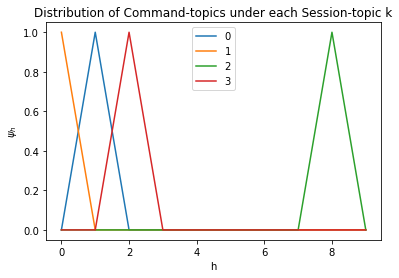

In [233]:
ax4 = pd.DataFrame(list(psi.values())).T.plot()
ax4.set_xlabel("h")
ax4.set_ylabel(r'$\psi_{h}$')
plt.title("Distribution of Command-topics under each Session-topic k")

In [92]:
psi={}
for k in range(4):
    psi[k]=np.repeat(.1,10)

In [101]:
psi[0]=[.7,.1,.025,.025,.025,.025,.025,.025,.025,.025]
psi[1]=[.025,.025,.7,.1,.025,.025,.025,.025,.025,.025]
psi[2]=[.025,.025,.025,.025,.7,.1,.025,.025,.025,.025]
psi[3]=[.025,.025,.025,.025,.025,.025,.7,.1,.025,.025]


In [100]:
sum([.7,.1,.025,.025,.025,.025,.025,.025,.025,.025])

1.0

In [145]:
theta = np.random.beta(a=30, b=1, size=10)

In [146]:
theta

array([0.99076563, 0.98810233, 0.97311955, 0.82004165, 0.99449215,
       0.93912909, 0.97741582, 0.8850368 , 0.95252241, 0.99959613])

In [212]:
phi={}
for k in range(30):
    phi[k] = np.random.dirichlet(alpha=np.ones(50)*.01)   

Text(0.5, 1.0, 'Distribution of words under each Command-topic h')

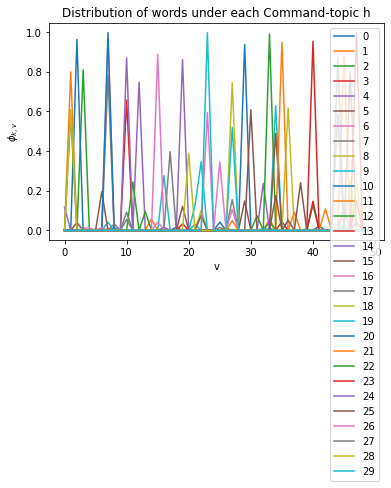

In [213]:
ax44 = pd.DataFrame(list(phi.values())).T.plot()
ax44.set_xlabel("v")
ax44.set_ylabel(r'$\phi_{k,v}$')
#ax4.get_legend().remove()

plt.title("Distribution of words under each Command-topic h")

In [165]:
phi

{0: array([7.85309918e-015, 8.70169122e-019, 4.33494594e-019, 3.33309192e-014,
        2.03915267e-026, 1.58349151e-056, 4.16602193e-134, 1.13319803e-036,
        2.17783450e-083, 1.47809931e-032, 1.11784672e-008, 7.58510885e-030,
        3.69036341e-011, 7.79337710e-121, 3.67405324e-030, 1.05260429e-002,
        4.91280624e-082, 8.96998874e-025, 2.65319457e-030, 9.89903498e-123,
        2.18343583e-051, 6.26191731e-057, 1.98282220e-011, 2.32214155e-096,
        1.19828467e-007, 1.11515238e-019, 5.23948008e-015, 3.24205409e-013,
        1.93413547e-004, 1.86230499e-021, 2.09268631e-006, 1.16912479e-122,
        7.74361166e-043, 7.84052497e-075, 9.88753991e-094, 5.97383010e-163,
        2.92129214e-093, 1.15236424e-005, 9.86890533e-001, 7.46172028e-091,
        1.23869588e-024, 3.75589848e-101, 2.37624705e-003, 1.52337571e-009,
        1.46300412e-008, 1.25310071e-104, 3.91463283e-010, 2.05019586e-075,
        1.36703729e-064, 9.03621035e-118]),
 1: array([1.63835224e-055, 1.03766987e-0

In [3]:
test=np.array(range(1,5,1))

In [4]:
test

array([1, 2, 3, 4])

In [5]:
test[-1]

4

In [7]:
b=np.random.beta(a=1, b=1, size=10)

In [8]:
b

array([0.65575041, 0.84164277, 0.24191975, 0.8656482 , 0.41773787,
       0.40797512, 0.98519745, 0.259133  , 0.82847044, 0.6333468 ])

In [ ]:
lam = np.ones(10)
lam[0] = b[0]
lam[1:-1] = b[1:-1] * np.cumprod(1-b)[:-2]
lam[-1] = 1 - np.sum(lam[:-1])

In [14]:
b[1:-1] 

array([0.84164277, 0.24191975, 0.8656482 , 0.41773787, 0.40797512,
       0.98519745, 0.259133  , 0.82847044])

In [15]:
np.cumprod(1-b)

array([0.34424959, 0.15835723, 0.75808025, 0.1343518 , 0.58226213,
       0.59202488, 0.01480255, 0.740867  , 0.17152956, 0.3666532 ])

In [16]:
np.cumprod(1-b)

array([3.44249588e-01, 5.45144097e-02, 4.13262972e-02, 5.55226232e-03,
       3.23287210e-03, 1.91394070e-03, 2.83311956e-05, 2.09896478e-05,
       3.60034500e-06, 1.32007801e-06])

In [10]:
np.cumprod(1-b)[:-2]

array([3.44249588e-01, 5.45144097e-02, 4.13262972e-02, 5.55226232e-03,
       3.23287210e-03, 1.91394070e-03, 2.83311956e-05, 2.09896478e-05])

In [6]:
alpha=2
Z=5
new=alpha+Z

In [7]:
new

7

In [4]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [5]:
np.add.outer(alpha + Z, np.arange(5))

array([ 7,  8,  9, 10, 11])

In [7]:
e0=3
s=np.arange(10)

In [10]:
e0+np.arange(10)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [11]:
np.add.outer(e0,np.arange(10))

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])